# A workspace for chiDM-b CLASS

In [1]:
from __future__ import division

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import math
from math import pi
import numpy as np
from numpy import log, log10, power, exp
from random import choice

from scipy.interpolate import interp1d

from time import time, sleep
from tqdm import tqdm
import os
import csv

# import classy module
from classy import Class

In [2]:
%config InlineBackend.figure_format = "retina"
matplotlib.rcParams['figure.figsize'] = (13,8)

In [3]:
base={'omega_b':0.0222,
      'h':0.6727,
      'z_reio':7.5,
      'ln10^{10}A_s':3.09,
      'n_s':0.9652,
      'YHe':0.242,
      'N_ur':3.046
     }

# largest_k = 160.
largest_k = 3.
others={'output':'tCl,lCl,pCl,mPk',
        'lensing':'yes',
        'P_k_max_h/Mpc':largest_k}

verbose={'background_verbose':3,
         'thermodynamics_verbose':5,
         'perturbations_verbose':1}

sync={'gauge':'synchronous'}

omega_cdm = 0.1199

lcdm={'omega_cdm':omega_cdm}

idm={'omega_cdm':1.e-30,
     'omega_chi':omega_cdm,
     'sigmav_fo':1.e-26,
     'Vrms2':1.e-8
    }

electron={'baryon_mass':'electron'}
proton={'baryon_mass':'proton'}
hydrogen={'baryon_mass':'hydrogen'}

kill_cx2={'kill cx2':'no'}

flags={
       'realistic Tx':'no',
       'is Tb blind to Tx':'no',
       'early blind Tb':'yes',
       'tight chi-baryon ic':'yes',
       'is theta_b blind to theta_x':'no',
       'ignore helium':'yes',
       'photoionization with Tg':'yes'
        }

ppr={'recfast_z_initial':1.e4,
     'recfast_Nz0':20000,
     'tol_thermo_integration':1.e-3,
#      'Rx_H_ratio':100.,
#      'dmde_buffer':20.,
     'reio_integrator':'stiff',
     'tol_dmde_integration':1.e-7,
     'start_small_k_at_tau_c_over_tau_h':1.e-4
    }

In [4]:
masses = np.logspace(-2, 5, 8)

sigmas_test = {}
sigmas_test[0, 'p'] = np.logspace(-30, -26, 20)
sigmas_test[-2, 'p'] = np.logspace(-35, -30, 20)
sigmas_test[0, 'e'] = np.logspace(-32, -23, 20)
sigmas_test[-2, 'e'] = np.logspace(-32, -25, 20)

In [5]:
lcdm

{'omega_cdm': 0.1199}

In [6]:
lcdm.update(base)
lcdm.update(others)
lcdm.update(verbose)
lcdm.update(sync)
lcdm.update({'photoionization with Tg':'yes'})

LCDM = Class()
LCDM.set(lcdm)

t0 = time()
LCDM.compute()
t1 = time()
print t1-t0

2.2234711647


In [9]:
sigmas = sigmas_test[0, 'e']

imx = 0
ixs = -1

mx = masses[imx]
# mx = 10000.

sigma = sigmas[ixs]
# sigma = 1.e-30
# sigma = 3.36e-24
# sigma = 1.96e-27

print 'mx={} GeV, sigma={} cm^2'.format(mx*1.e-3, sigma)

idm.update(base)
idm.update(others)
idm.update(verbose)
idm.update(ppr)
idm.update(flags)
idm.update(sync)
# idm.update(proton)
idm.update(electron)
idm.update({'pow_n':0.,
            'sigma_0':sigma,
            'mx':mx})
idm.update({'refine':100,
            'z_dmde_max':1.e9
           })

IDM = Class()
IDM.set(idm)
t0 = time()
IDM.compute()
t1 = time()

print t1-t0

mx=1e-05 GeV, sigma=1e-23 cm^2
2.83261799812


In [ ]:
sigmas = sigmas_test[0, 'e']
rescale = 1.

for i in xrange(10):
    
#     sleep(1.5)
    
    mx = choice(masses)
    sigma = choice(sigmas)
    
    print '(i={}) mx={} GeV, sigma={} cm^2'.format(i, mx*1.e-3, sigma)
    
    idm.update(base)
    idm.update(others)
    idm.update(verbose)
    idm.update(ppr)
    idm.update(flags)
    idm.update(sync)
#     idm.update(proton)
    idm.update(electron)
    idm.update({'pow_n':0.,
                'sigma_0':sigma,
                'mx':mx})
    idm.update({'refine':100,
                'z_dmde_max':1.e9})
    
    IDM = Class()
    IDM.set(idm)
    t0 = time()
    IDM.compute()
    t1 = time()
    
    IDM.empty()
    del IDM
    
    print t1-t0

(i=0) mx=100.0 GeV, sigma=8.8586679041e-32 cm^2
2.5641541481
(i=1) mx=100.0 GeV, sigma=2.33572146909e-30 cm^2
2.87657499313
(i=2) mx=0.0001 GeV, sigma=1.83298071083e-28 cm^2
2.55002093315
(i=3) mx=0.001 GeV, sigma=2.33572146909e-30 cm^2
2.72578001022


In [10]:
z0 = 1.e7

print 'LCDM: Tb({:.3e})={:.3e} K'.format(z0, LCDM.baryon_temperature(z0))#, LCDM.chidm_temperature(this_z)
print 'IDM: Tb({:.3e})={:.3e} K\n     Tx({:.3e})={:.3e} K'.format(z0, IDM.baryon_temperature(z0), z0, IDM.chidm_temperature(z0))
print 'IDM: Rx({:.3e})={:.3e} 1/Mpc,\n     Rx\'({:.3e})={:.3e} 1/Mpc,\n     aH({:.3e})={:.3e} 1/Mpc'.format(z0, IDM.Rx(z0), z0, IDM.Rx_prime(z0), z0, IDM.Hubble(z0)/(1+z0))
print 'IDM: Rx/aH({:.3e})={:.3e},\n     Rx\'/aH({:.3e})={:.3e}'.format(z0, (1+z0)*IDM.Rx(z0)/IDM.Hubble(z0), z0, (1+z0)*IDM.Rx_prime(z0)/IDM.Hubble(z0))

print 'IDM: z_nr={:.3e},\n     z_thdec={:.3e}\n     z_tcdec={:.3e}'.format(IDM.z_nr(), IDM.z_thdec(), IDM.z_tcdec())

del z0

LCDM: Tb(1.000e+07)=2.726e+07 K
IDM: Tb(1.000e+07)=2.726e+07 K
     Tx(1.000e+07)=2.726e+07 K
IDM: Rx(1.000e+07)=5.951e+08 1/Mpc,
     Rx'(1.000e+07)=1.142e+07 1/Mpc,
     aH(1.000e+07)=2.158e+01 1/Mpc
IDM: Rx/aH(1.000e+07)=2.758e+07,
     Rx'/aH(1.000e+07)=5.293e+05
IDM: z_nr=1.419e+07,
     z_thdec=2.298e+03
     z_tcdec=4.090e+02


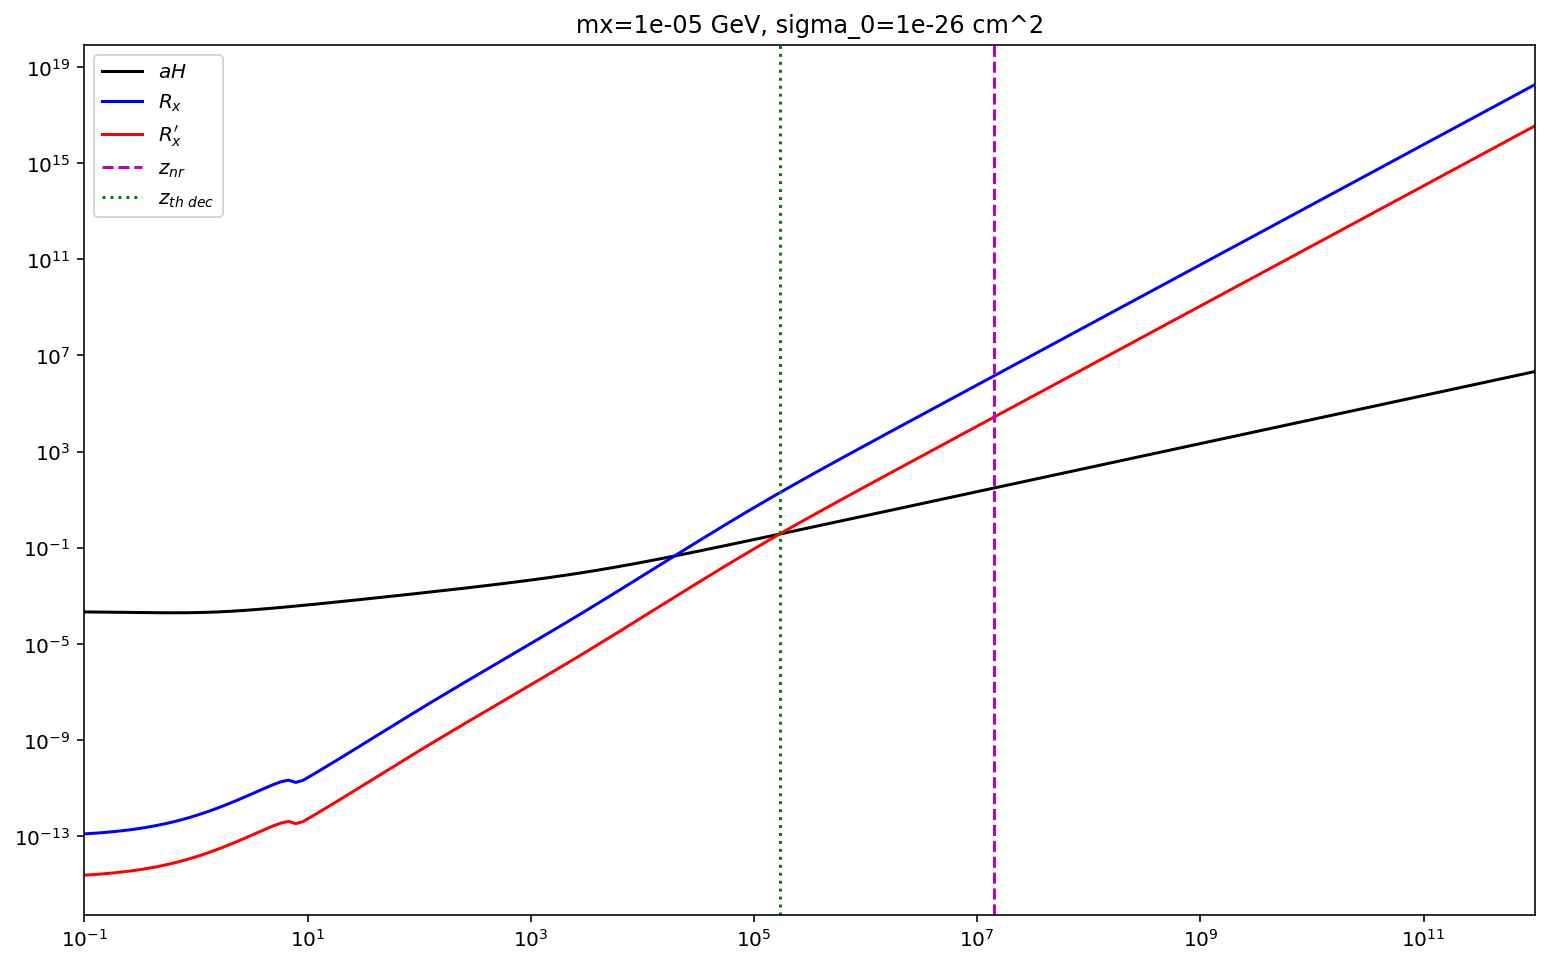

In [10]:
zmax = 1.e12
zarr = np.logspace(-1, log10(zmax), 200)

Rx_arr = np.array([ IDM.Rx(z) for z in zarr ])
Rxp_arr = np.array([ IDM.Rx_prime(z) for z in zarr ])
aH_arr = np.array([ IDM.Hubble(z)/(1.+z) for z in zarr ])

plt.loglog(zarr, aH_arr, 'k', label=r'$aH$')
plt.loglog(zarr, Rx_arr, 'b', label=r'$R_x$')
plt.loglog(zarr, Rxp_arr, 'r', label=r"$R_x'$")

plt.axvline(IDM.z_nr(), color='m', linestyle='--', label=r"$z_{nr}$")
plt.axvline(IDM.z_thdec(), color='g', linestyle=':', label=r"$z_{th\ dec}$")

plt.xlim(0.1, zmax)

plt.legend()

plt.title('mx={} GeV, sigma_0={} cm^2'.format(mx*1.e-3, sigma))

del zarr, Rx_arr, Rxp_arr, aH_arr

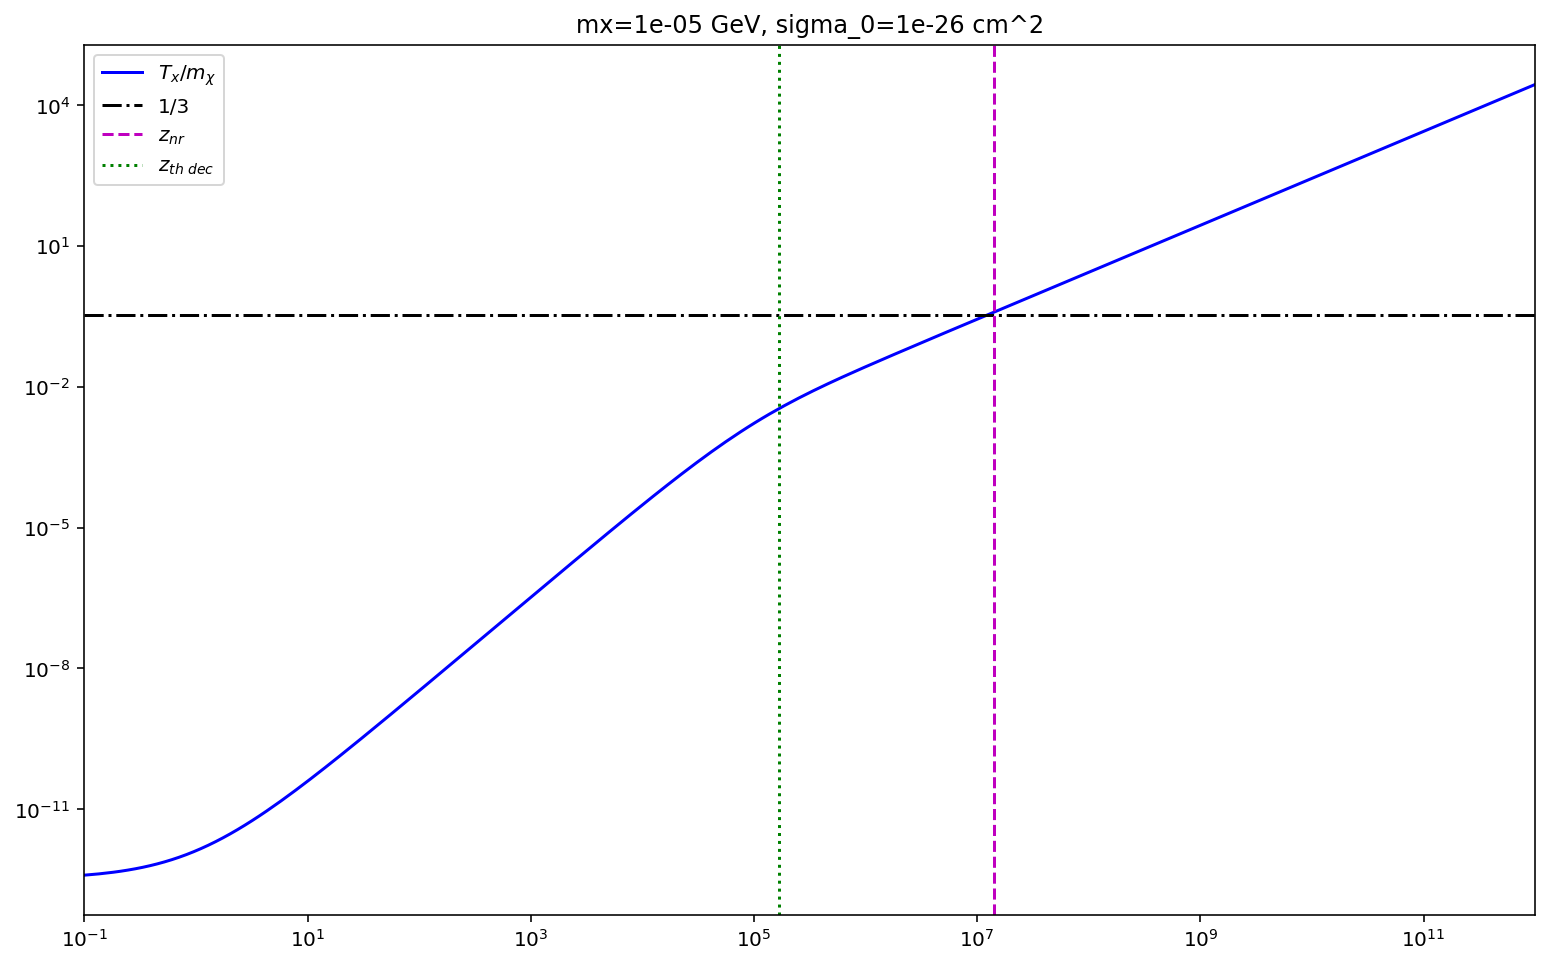

In [11]:
K_to_MeV = 1.e-10

zmax = 1.e12
zarr = np.logspace(-1, log10(zmax), 200)

Tx_arr = np.array([ IDM.chidm_temperature(z) for z in zarr ])
Tb_arr = np.array([ IDM.baryon_temperature(z) for z in zarr ])

# plt.loglog(zarr, Tb_arr, 'k')
# plt.loglog(zarr, Tx_arr, 'b', label=r"$T_x$")

plt.loglog(zarr, Tx_arr*K_to_MeV/IDM.mx(), 'b', label=r"$T_x/m_\chi$")

plt.axhline(1./3, color='k', linestyle='-.', label='1/3')
plt.axvline(IDM.z_nr(), color='m', linestyle='--', label=r"$z_{nr}$")
plt.axvline(IDM.z_thdec(), color='g', linestyle=':', label=r"$z_{th\ dec}$")

plt.xlim(0.1, zmax)

plt.legend()

plt.title('mx={} GeV, sigma_0={} cm^2'.format(mx*1.e-3, sigma))

del zarr, Tx_arr, Tb_arr

In [12]:
h = LCDM.h()

# Getting P(k) at redhsift z=0

kk = np.logspace(-5, 2, 300) # Nadler's values for k
LPk = [] # P(k) in (Mpc/h)**3
IPk = []

for k in kk:
    LPk.append(LCDM.pk_lin(k*h, 0.)*h**3) # function .pk(k,z)
    IPk.append(IDM.pk_lin(k*h, 0.)*h**3)

LPk=np.array(LPk)
IPk=np.array(IPk)

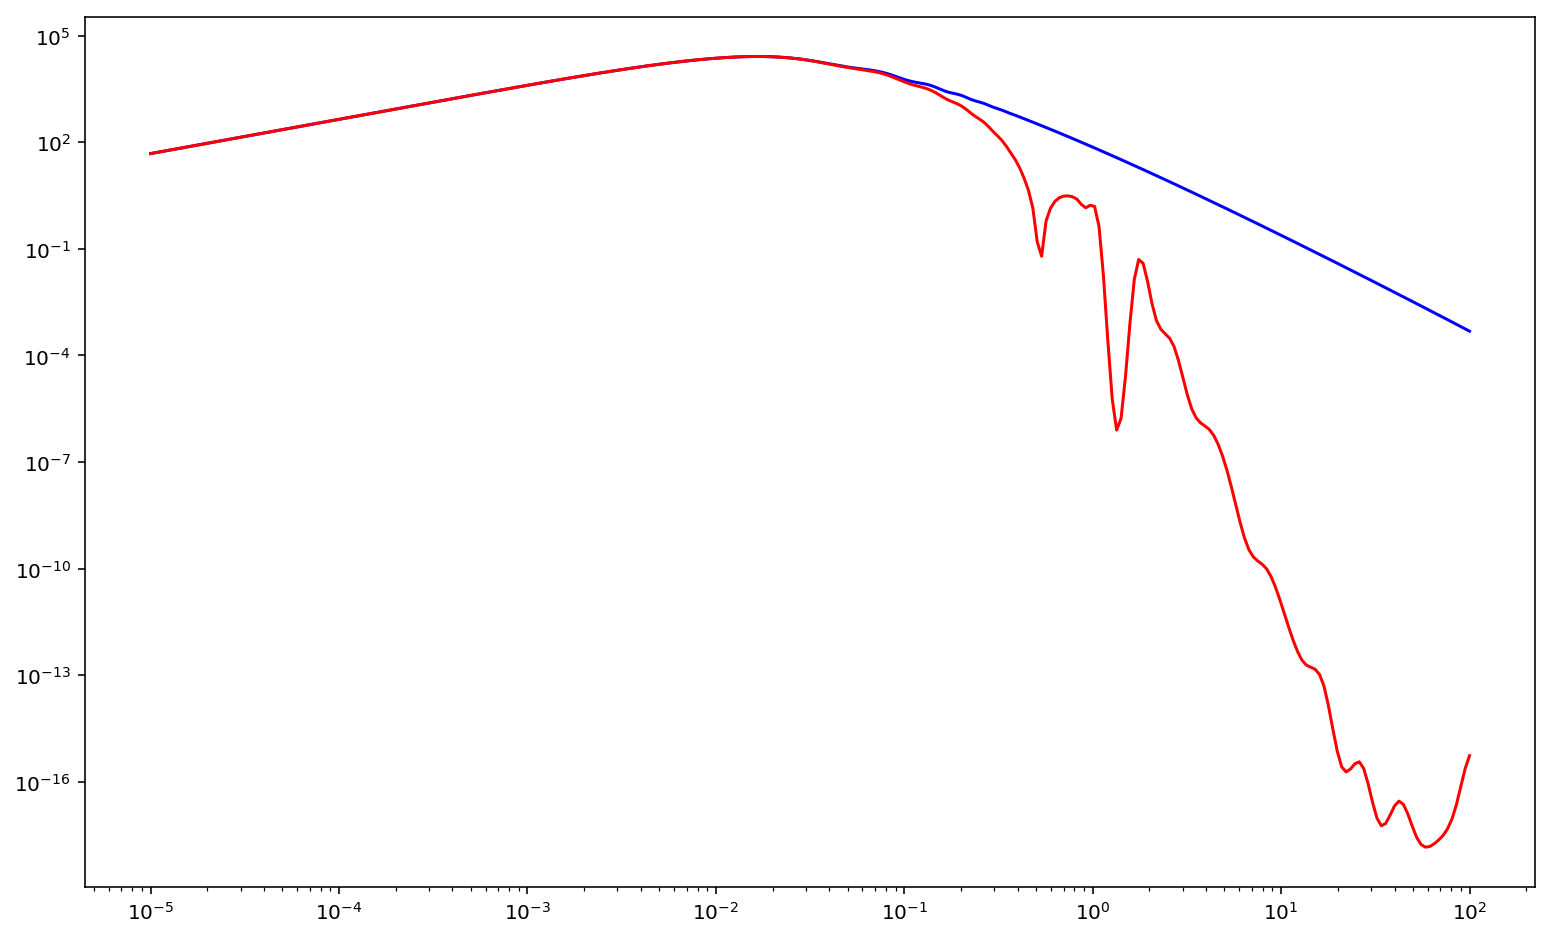

In [13]:
plt.xscale('log');plt.yscale('log');

plt.plot(kk, LPk, 'b')
plt.plot(kk, IPk, 'r')

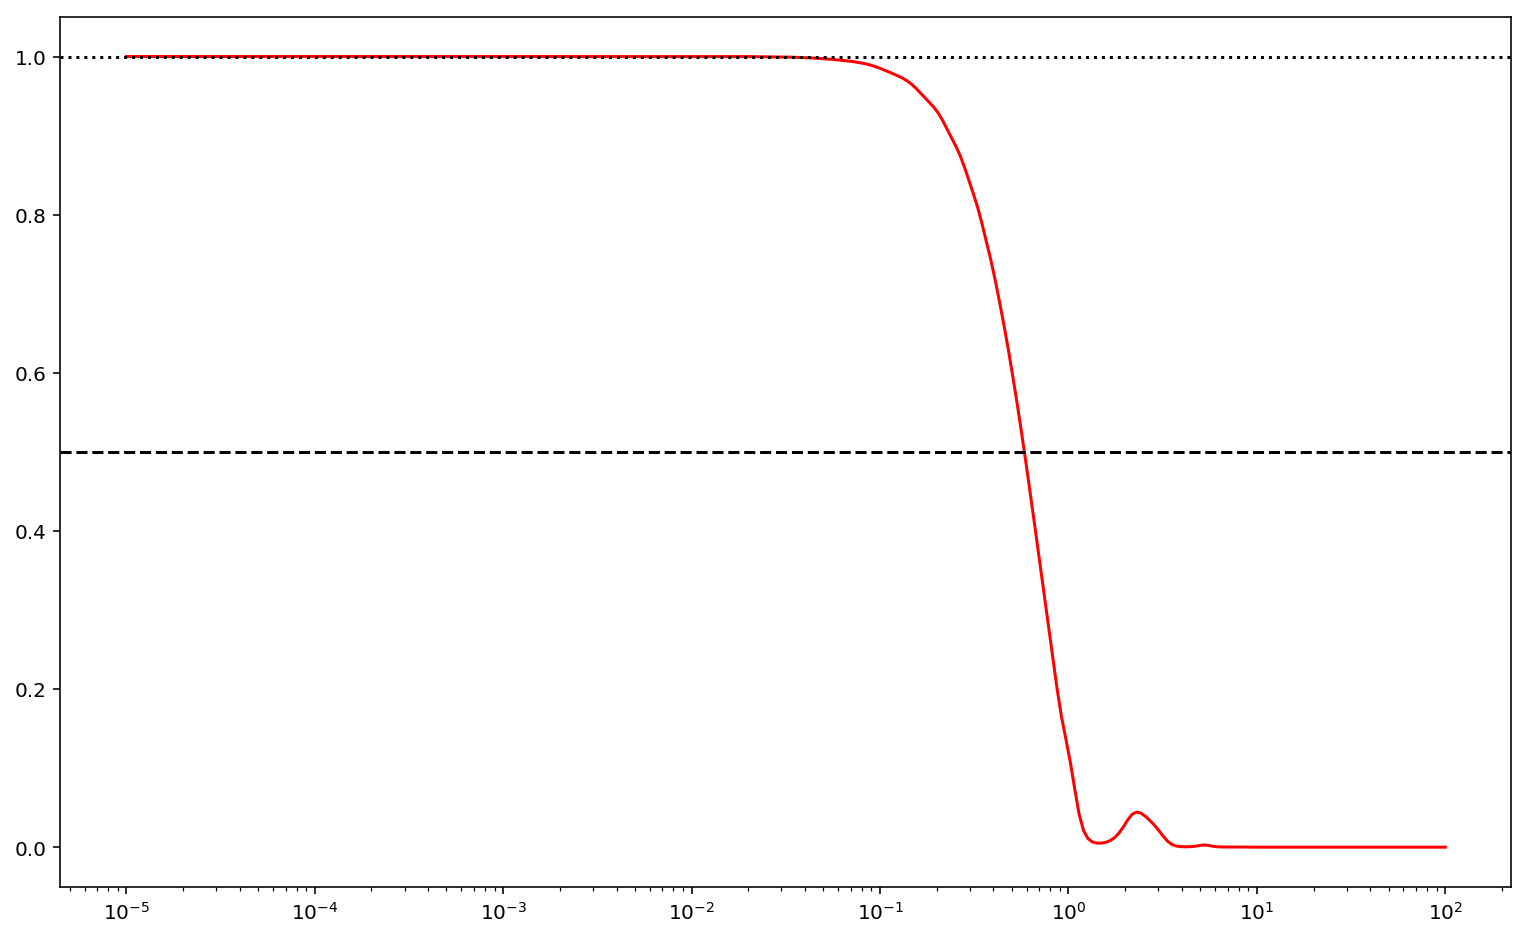

In [36]:
plt.xscale('log');
plt.yscale('linear');

plt.plot(kk, IPk/LPk, 'r')

plt.axhline(y=0.5, linestyle='--', color='k')
plt.axhline(y=1., linestyle=':', color='k')